# Exploratory Data Analysis
- critical process of performing inital inevestigation on the data to:
 1- Help identify error in data set.
 2- Discover pattern.
 3- detect outlier.

Messy datasets? Missing values?
missingno provides a small toolset of flexible and easy-to-use missing data visualizations,
and utilities that allows you to get a quick visual summary of the completeness (or lack thereof) of your dataset. 


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
! pip install missingno

In [13]:
df3 = pd.read_csv('udemy_courses.csv')

In [14]:
df3.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Unnamed: 12
0,1070968.0,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,NaN,200,2147.0,23.0,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,NaN
1,1113822.0,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792.0,NaN,274,All Levels,39,2017-03-09T16:34:20Z,Business Finance,NaN
2,1006314.0,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,NaN,2174.0,74.0,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,NaN
3,1210588.0,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451.0,11.0,36,All Levels,3,2017-05-30T20:07:24Z,Business Finance,NaN
4,1011058.0,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,NaN,45.0,26,Intermediate Level,2,2016-12-13T14:57:18Z,Business Finance,NaN


# Data Cleaning:
 - Null 
 - Outliers
 - Duplicated
 - Wrong format : column types
 - Delete unnecessary columns


<AxesSubplot:>

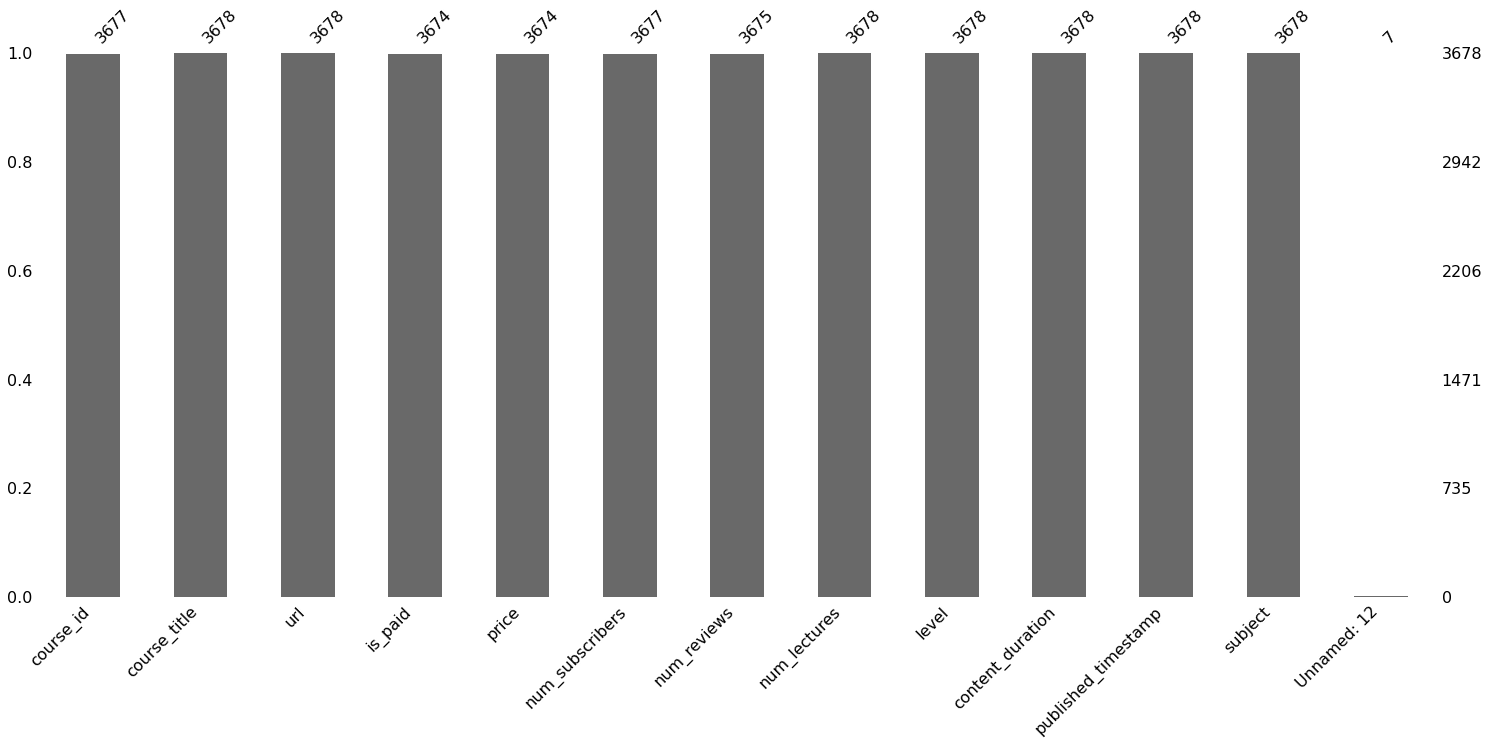

In [15]:
msno.bar(df3)

In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3677 non-null   float64
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3674 non-null   object 
 4   price                3674 non-null   object 
 5   num_subscribers      3677 non-null   float64
 6   num_reviews          3675 non-null   float64
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   object 
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
 12  Unnamed: 12          7 non-null      object 
dtypes: float64(3), int64(1), object(9)
memory usage: 373.7+ KB


In [18]:
df3.isnull().sum()

course_id                 1
course_title              0
url                       0
is_paid                   4
price                     4
num_subscribers           1
num_reviews               3
num_lectures              0
level                     0
content_duration          0
published_timestamp       0
subject                   0
Unnamed: 12            3671
dtype: int64

In [20]:
df3[df3.isnull()==True]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df3[df3.isnull().any(axis=1)]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Unnamed: 12
0,1070968.0,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,NaN,200,2147.0,23.0,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,NaN
1,1113822.0,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792.0,NaN,274,All Levels,39,2017-03-09T16:34:20Z,Business Finance,NaN
2,1006314.0,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,NaN,2174.0,74.0,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,NaN
3,1210588.0,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451.0,11.0,36,All Levels,3,2017-05-30T20:07:24Z,Business Finance,NaN
4,1011058.0,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,NaN,45.0,26,Intermediate Level,2,2016-12-13T14:57:18Z,Business Finance,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618.0,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040.0,14.0,21,All Levels,2,2016-06-14T17:36:46Z,Web Development,NaN
3674,1088178.0,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306.0,3.0,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development,NaN
3675,635248.0,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513.0,169.0,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development,NaN
3676,905096.0,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300.0,31.0,38,All Levels,3,2016-08-11T19:06:15Z,Web Development,NaN


# Null , missed data
- See null values
- Delete it 
- Convension : label : category 5K
- Fillna [mean,median,mode]


In [22]:
def datect_outliers(column):
    q3 = np.quantile(df3[column],0.75)
    q1 = np.quantile(df3[column],0.25)
    
    irq = (q3-q1)
    lower_limit = q1-(1.5*irq)
    upper_limit = q3-(1.5*irq)
    outlier = df3[(df3[column]<lower_limit) | (df3[column]>upper_limit)]
    return outlier

In [ ]:
datect_outliers('content_duration')

In [66]:
datect_outliers('price')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


<AxesSubplot:ylabel='num_subscribers'>

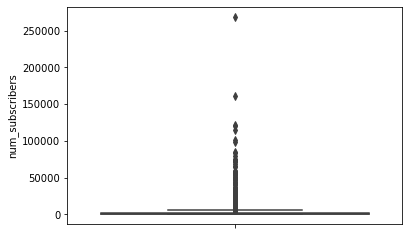

In [26]:
sns.boxplot(y=df3['num_subscribers'])

In [27]:
df3['num_subscribers'].max()

268923.0

In [ ]:
df3['num_subscribers'].min()

In [28]:
df3['num_subscribers'].median()

901.0

In [29]:
df3.describe()

,course_id,num_subscribers,num_reviews,num_lectures
count,3.677000e+03,3677.000000,3675.000000,3678.000000
mean,6.761398e+05,3193.446832,160.368707,40.126427
std,3.431689e+05,9504.291982,959.976198,50.457607
min,8.324000e+03,0.000000,0.000000,0.000000
25%,4.077960e+05,110.000000,4.000000,15.000000
50%,6.880920e+05,901.000000,18.000000,25.000000
75%,9.615080e+05,2543.000000,67.000000,45.750000
max,1.282064e+06,268923.000000,27445.000000,779.000000


In [32]:
df3.shape

(3678, 13)